## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

## Création des données d'entrainement

In [3]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


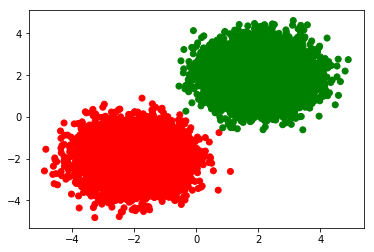

In [4]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [5]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [6]:
list(datas[0])+[labels[0]]

[-1.5280180822046203, -2.8407635101885225, 0.0]

In [7]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0       -1.5280180822046203  -2.8407635101885225     red
1        -3.229304122862956  -1.5883971683360754     red
2       -0.8133988351127219  -2.7601121043049126     red
3        -1.355165888551118  -2.6474539090658054     red
4       -1.9304634157459988  -1.9779124903451017     red
5       -2.0020834061169026  -2.3851518254931463     red
6       -2.7818066517594886  -2.2754536071715163     red
7       -2.7782730947942254  -1.5341600014811814     red
8       -2.7415797604730754  -2.1953299055054516     red
9       -1.0258542235703165   -1.701510597680849     red
10      -2.9892802864745764  -1.4995910092565186     red
11      -2.0545377171337513   -3.939131919497595     red
12      -1.7111580644717455  -1.6404459972103733     red
13       -1.819555500602887  -2.2709551160825394     red
14       -2.339028929122391  -1.9592727078783179     red
15      -1.5773630751549252  -1.7989937620289091     red
16      -1.5353785551296104  -2.4761530994628225     red
17       -2.937189704265764    -2.13087831730522     red
18      -1.9326630613619429  -1.4802658801293382     red
19      -2.4074798214057167  -2.1655874700619075     red
20      -1.6980758276033556  -1.6226910204832785     red
21      -3.4090747618259876  -1.0898644131189008     red
22        -2.48886594721854  -1.1945683466597465     red
23      -1.4756256071142277  -1.3975306625368218     red
24       -2.481529939245352   -2.240481201087181     red
25       -2.940427319640314   -2.062371609434675     red
26      0.19538594564019363  -1.8545780624945492     red
27       -2.471651475649057   -1.953381423824415     red
28     -0.40199088825275475  -1.7684147000386508     red
29      -2.3649161779201435   -1.456528548198949     red
...                     ...                  ...     ...
19970    2.1977813880353816   1.5613072785611823   green
19971    2.4042326963840095   2.0178957988680266   green
19972    1.8313881655573316    1.986641081985554   green
19973     2.672118989181477   1.6377079379030781   green
19974     2.111752658550685   1.9704639287941303   green
19975     1.675857726626976   3.3892704256395465   green
19976    1.9021499454656863   1.7165204515150916   green
19977    1.5617421544262826    2.621384170247179   green
19978    1.8278110985366238   2.1486003933352333   green
19979    2.7283715057586466   3.0440355202043508   green
19980     1.615547303570254   2.6185691396292263   green
19981    1.2211416102107986   0.6679062433109408   green
19982    2.4341790843523885   0.8943181922843673   green
19983     2.957809240552482   2.1442221386778177   green
19984    1.0823483234236473   3.2334030076251685   green
19985      2.39237827209101   1.8716170951862272   green
19986    1.1941825845820802   1.7560040185302717   green
19987    1.8489645106057693   2.0893841962214643   green
19988     2.666313361906319   2.3035109561639597   green
19989    0.8156647503030787   2.6397391957028127   green
19990    2.2435717443018577   2.6639179211795687   green
19991    1.9516815612477838   2.7057225338211923   green
19992    0.5001479592664588   2.2064075200075868   green
19993    1.3427213770003388    3.090476845301885   green
19994    2.9095800167043704   1.3407579088568293   green
19995    1.8657487101987598    2.516832101310144   green
19996     1.344610817307778   1.5497251554932279   green
19997    2.6292812347463124   2.6076909528328667   green
19998    0.8864589558156935   1.4182673534342225   green
19999     2.607808005098547   3.3649762618063193   green

[20000 rows x 3 columns]

## Création du modèle

In [8]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [9]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [10]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.8566859  0.14331411]]
Found :  0
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [12]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [13]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [14]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0624 - acc: 0.9974 - val_loss: 0.0246 - val_acc: 0.9995
Epoch 2/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0160 - acc: 0.9999 - val_loss: 0.0143 - val_acc: 0.9995
Epoch 3/10
16000/16000 [==============================] - 1s 80us/sample - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0105 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0079 - acc: 1.0000 - val_loss: 0.0085 - val_acc: 0.9998
Epoch 5/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0056 - acc: 0.9999 - val_loss: 0.0063 - val_acc: 0.9998
Epoch 7/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0049 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

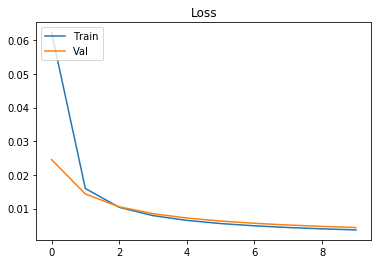

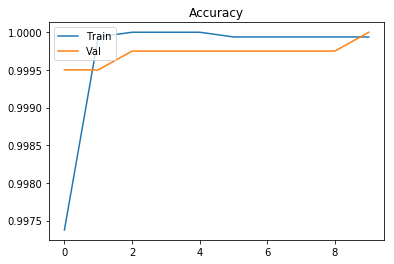

In [15]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [16]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[5.9366348e-04 9.9940634e-01]
 [9.9957007e-01 4.2989186e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [17]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.54028034 0.4597196 ]
 [0.8226492  0.17735085]
 [0.9482075  0.05179248]]


['darkred', 'darkred', 'darkred']

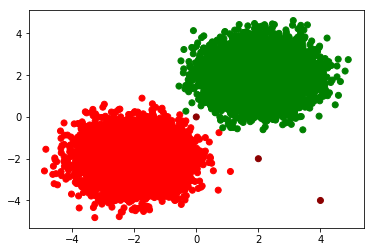

In [18]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [19]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 744us/sample - loss: 5.1193e-04 - acc: 1.0000
Test Loss 0.0005119291017763317
Test Accuracy 1.0


[[5.9366348e-04 9.9940634e-01]
 [9.9957007e-01 4.2989186e-04]]


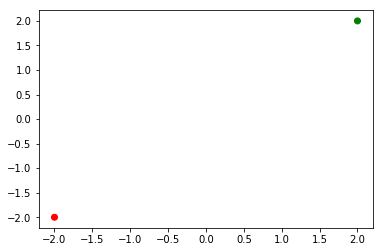

In [20]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [21]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

In [22]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [23]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [24]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [25]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[-2.92261843 -2.75357209]]
[[0.61669457 0.38330543]]
Found :  red
Should be :  red


## Résumé du modèle (couches de neurones)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [27]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [28]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 326us/sample - loss: 0.7073 - acc: 0.6787 - val_loss: 0.6170 - val_acc: 0.7050
Epoch 2/10
800/800 [==============================] - 0s 80us/sample - loss: 0.5138 - acc: 0.7812 - val_loss: 0.4917 - val_acc: 0.8400
Epoch 3/10
800/800 [==============================] - 0s 101us/sample - loss: 0.4356 - acc: 0.8950 - val_loss: 0.4347 - val_acc: 0.8900
Epoch 4/10
800/800 [==============================] - 0s 96us/sample - loss: 0.3952 - acc: 0.9312 - val_loss: 0.3998 - val_acc: 0.9050
Epoch 5/10
800/800 [==============================] - 0s 100us/sample - loss: 0.3678 - acc: 0.9413 - val_loss: 0.3739 - val_acc: 0.9350
Epoch 6/10
800/800 [==============================] - 0s 96us/sample - loss: 0.3459 - acc: 0.9463 - val_loss: 0.3523 - val_acc: 0.9350
Epoch 7/10
800/800 [==============================] - 0s 64us/sample - loss: 0.3276 - acc: 0.9563 - val_loss: 0.3339 - val_acc: 0.9450
Epoch 

## Le modèle est-il bien entraîné ?

In [29]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [30]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 57us/sample - loss: 0.2932 - acc: 0.9580
Test Loss 0.29316231870651244
Test Accuracy 0.958


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [31]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

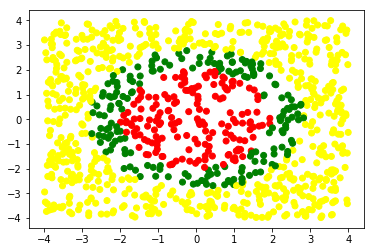

In [32]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(6,activation="relu"))
model.add(tf.keras.layers.Dense(6,activation="relu"))
model.add(tf.keras.layers.Dense(3,activation="softmax"))

model.complie(
    loss = "sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)
labels=np.array(labels)
history=model.fit(datas, labels, epochs=100, validation_split=0.2)

In [ ]:
loss_curve = history.history["loss"]
acc_cuve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

